<a href="https://colab.research.google.com/github/Shiva-eb/MLProjects/blob/master/TimeSeries_Vehicle_Miles_Travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Dataset**

The dataset used in this project is from US Federal Highway Administration, showing the travel volume trend in milions of miles from 1970 to 2019.[1](https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA)

**Forecasting Traffice Volume for the next 12 months**

Using the data provide in the aforementioned link, I will create a model to forecast the call traffic from December of 2020 to November of 2021. Steps:


1.   Exploring Data
2.   Model I, II: SARIMA & SARIMAX
3.   Model III: Deep Learning
4.   Model IV: FaceBook Prophet
5.   Comparing the performance of the models
6.   Retraining of the model and forecasting
7.   Conclusion

*This project is done as a part of my UDemy course: Python for Time Series Data Analysis.


**1. Exploring the Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import data
from google.colab import files
uploaded=files.upload()


Saving Milage.csv to Milage (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Milage.csv']),index_col='DATE',parse_dates=True)



In [4]:
#Set the dataframe frequency
df.index.freq='MS'

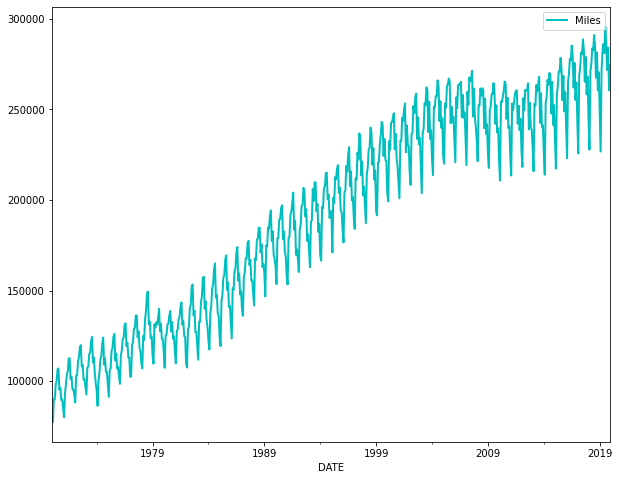

In [5]:
#Plot the Data
df.plot.line(figsize=(10,8),lw=2,color='c')

**Decomposing the Time Series**
In this section we further investigate the: Trend and Seasonality.

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_df=seasonal_decompose(df,model='additive')

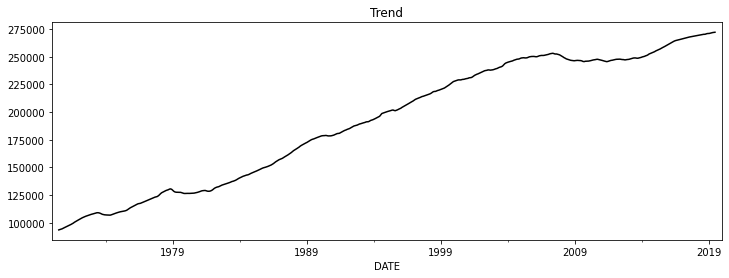

In [7]:
seasonal_df.trend.plot(figsize=(12,4),color='black',title='Trend');


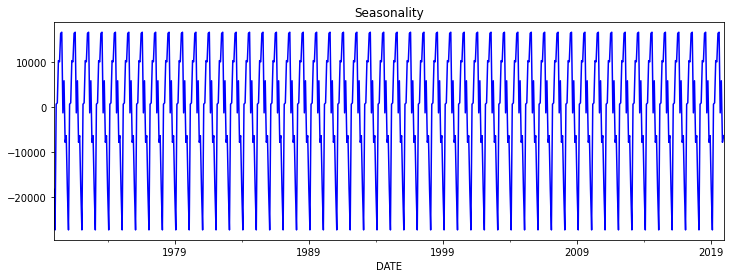

In [8]:
seasonal_df.seasonal.plot(figsize=(12,4),color='b',title='Seasonality');

# **SARIMA and SARIMA Models**

In [9]:
#Importing ARIMA, SARIMA, SARIMAX Libraries
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
train=df[:len(df)-12]
test=df[len(df)-12:]

In [11]:
from pmdarima import auto_arima 

In [12]:
#!pip install pmdarima

In [18]:
auto_arima(train,seasonal=True,trace=True,m=12).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=10892.839, Time=6.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11038.909, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10951.904, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=10921.275, Time=0.71 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=10921.851, Time=3.00 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=inf, Time=6.20 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=inf, Time=15.29 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=10891.069, Time=14.20 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=inf, Time=10.06 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=inf, Time=19.35 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=10889.222, Time=10.13 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=inf, Time=7.66 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=10891.005, Time=4.30 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=inf, Time=15.56 sec
 ARIMA(1,1,2)(0,1,1)[12]           

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  588
Model:             SARIMAX(1, 1, 2)x(2, 1, [1], 12)   Log Likelihood               -5437.354
Date:                              Tue, 09 Feb 2021   AIC                          10888.708
Time:                                      02:49:13   BIC                          10919.188
Sample:                                           0   HQIC                         10900.596
                                              - 588                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9589      0.025    -38.867      0.000      -1.007      -0.911
ma.L1          0.7223      0.023     31.470      0.000       0.677       0.767
ma.L2         -0.2640      0.010    -25.373      0.000      -0.284      -0.244
ar.S.L12       0.3000      0.055      5.453      0.000       0.192       0.408
ar.S.L24      -0.0770      0.019     -4.108      0.000      -0.114      -0.040
ma.S.L12      -0.6290      0.061    -10.251      0.000      -0.749      -0.509
sigma2      9.695e+06   1.89e-09   5.12e+15      0.000    9.69e+06    9.69e+06
===================================================================================
Ljung-Box (L1) (Q):                  21.15   Jarque-Bera (JB):               413.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.66
Prob(H) (two-sided):                  0.70   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.52e+32. Standard errors may be unstable.
"""

In [21]:
m1=SARIMAX(train,order=(1,1,2),seasonal_order=(2,1,1,12))
results1=m1.fit()

In [35]:
prediction1=results1.predict(start=len(train),end=len(df)-1,dynamic=False,typ='levels')

In [36]:
len(prediction1)

12

In [37]:
#SARIMAX_Error
from sklearn import metrics
SARIMAX_MAE= metrics.mean_absolute_error(test, prediction1)
SARIMAX_MSE= metrics.mean_squared_error(test, prediction1)
SARIMAX_RMSE= np.sqrt(metrics.mean_squared_error(test, prediction1))

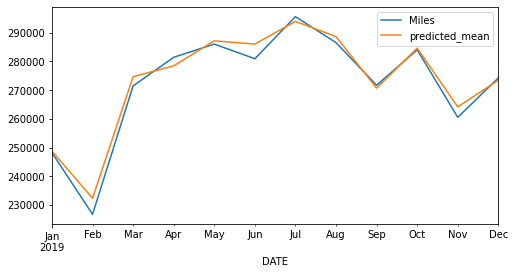

In [38]:
test.plot(legend=True,figsize=(8,4))
prediction1.plot(legend=True);


# **Deep Learning**

**Scale Data**

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

**Time Series Generator**

In [41]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)